# Imports

In [0]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
from numpy.random import default_rng
import time
rng = default_rng()

# Creating clusters dataset

In [0]:
#Weights
np.random.seed(0)
class data_set1:
  def __init__(self):
    self.cov1= [[0,0],[0,0]]  #covariance for class1
    self.cov2=[[0,0],[0,0]]   #covariance for class2   
    
    # method to adjust noise
  def noise(self,amt1,amt2=0):             
    n1=(3.5 - 0.4)*(amt1) + 0.4  #3.5 is max covariance and 0.4 is min covariance taken for noise
    self.cov1=[[n1,0],[0,n1]]
    if(amt2==0):
      amt2=amt1
    n2=(3.5 - 0.4)*(amt2) + 0.4
    self.cov2=[[n2,0],[0,n2]]
  #method to create data
  def create(self,n=2,items=100,noise=0):
    self.noise(noise,noise)
    self.n= n
    
    self.items= int(np.round(items/n))    # items per class =  all items / n 
    mx = rng.choice(int(self.n), size=self.n, replace=False)  # random x value of mean 
    my = rng.choice(int(self.n), size=self.n, replace=False)  # random y value of mean
    for i in range(self.n):
        if(i==0):
          x1, y1 = np.random.multivariate_normal([mx[i]*3,my[i]*2], self.cov1, self.items).T  #class1
          self.d1_data = np.array([x1,y1,np.zeros(x1.shape)+i])
        else:
          x2, y2 = np.random.multivariate_normal([mx[i]*3,my[i]*2], self.cov2, self.items).T  #class2
          self.d1_data=np.append(self.d1_data,[x2,y2,np.zeros(x1.shape)+i],axis=1)
          
    #appending both classes to 1 array and also adding another column of labels
    self.d1_data=self.d1_data.T
    return self.d1_data
  def plot(self):
    plt.figure(figsize=(5,5))
    plt.scatter(self.d1_data[:,0],self.d1_data[:,1],c=self.d1_data[:,2])
    ax = plt.gca()
    ax.set_facecolor('xkcd:salmon')
    ax.set_facecolor((0, 0, 0))
    plt.show()



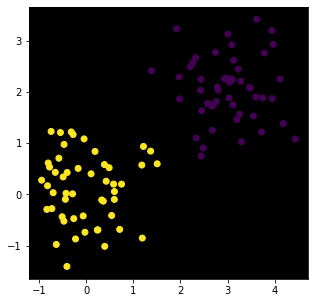

In [72]:
obj1=data_set1()
dataset=obj1.create(2,100,0.00)   #class,items,noise
np.random.shuffle(dataset)
obj1.plot()

# Training and testing model

In [0]:
class Model:
    def __init__(self,X_train,y_train):
        self.lossList=[]
        self.y_train=y_train
        self.X_train=X_train

    def sigmoid(self,x):
        return 1/(1+np.exp(-x))

    def sigmoidDerivation(self,x):
        return x * (1 - x)
    def lossFunction(self,y,t):
        return np.mean(np.power(y - t,2))

    def trainModel(self,learningRate,iterations,phase='train'):
        self.learningRate = learningRate
        self.iterations=iterations
        self.w0 = 2*np.random.random((2, 5)) - 1
        self.w1 = 2*np.random.random((5, 1)) - 1

        for i in range(self.iterations):
            #Feedforward propagation
            layer0 = self.X_train
            layer1 = self.sigmoid(np.dot(layer0, self.w0))
            layer2 = self.sigmoid(np.dot(layer1, self.w1))
            loss=self.lossFunction(layer2,self.y_train)
            #Backpropagation 
            layer2_error =  self.y_train - layer2
            layer2_delta = layer2_error * self.sigmoidDerivation(layer2)
            layer1_error = layer2_delta.dot(self.w1.T)
            layer1_delta = layer1_error * self.sigmoidDerivation(layer1)
            #updating gradients
            self.w1 += np.dot(layer1.T,layer2_delta) * self.learningRate
            self.w0 += np.dot(layer0.T,layer1_delta) * self.learningRate
            #append loss
            self.lossList.append(loss)
        return self.lossList

    def testModel(self,data,output):
        layer0 = self.X_train
        layer1 = self.sigmoid(np.dot(layer0, self.w0))
        layer2 = self.sigmoid(np.dot(layer1, self.w1))
        layer2=np.where(layer2>0.50,1,0)
        accuracy=(layer2==output).mean()
        return accuracy

    def plot(self,loss):
        #Plot the accuracy chart
        plt.plot(loss)
        plt.xlabel('Training')
        plt.ylabel('Loss')
        plt.show()

In [0]:
def trainTestSplit(data,p,q):
    trainData=data[:int(data.shape[0] * p),:-1]
    trainLabel=data[:int(data.shape[0] * p),-1]
    testData=data[(int(data.shape[0] * p)):,:-1]
    testLabel=data[(int(data.shape[0] * p)):,-1]
    return trainData,trainLabel,testData,testLabel

Preparing Data

In [0]:
label=dataset[:,-1]
label=label.reshape(label.shape[0],1)
trainData,trainLabel,testData,testLabel=trainTestSplit(dataset,0.9,0.1)
trainLabel=trainLabel.reshape(trainLabel.shape[0],1)
testLabel=testLabel.reshape(testLabel.shape[0],1)

Running Model

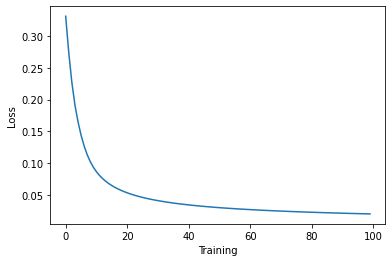

Training Accuracy 0.99%


In [76]:
model=Model(trainData,trainLabel)
loss=model.trainModel(0.1,100)
trainingAccuracy=model.testModel(testData,trainLabel)
model.plot(loss)
print("Training Accuracy " + str(round(trainingAccuracy,2)) + "%")